# 1. Importing Libraries

In [452]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import keras
from keras.layers import Dense,Dropout

import pandas as pd
from tensorflow.keras.models import Sequential

from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (20, 10)


In [453]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 70D6-B03A

 Directory of c:\Users\MWAMBA\Clustering_HO

01/09/2023  08:36 PM    <DIR>          .
01/09/2023  08:36 PM    <DIR>          ..
12/13/2022  12:21 PM    <DIR>          .ipynb_checkpoints
01/09/2023  10:15 PM         1,644,871 Clustering.ipynb
12/13/2022  12:12 PM            23,701 LEO1_LLA_Position.csv
01/04/2023  03:15 PM    <DIR>          New_Data
12/13/2022  12:12 PM        11,102,849 NTN.csv
01/09/2023  10:47 AM        87,511,443 NTN_Dataset.csv
               4 File(s)    100,282,864 bytes
               4 Dir(s)  35,294,089,216 bytes free


# 2. Loading The Data

In [454]:
# Loading UE Data
UE_data = pd.read_csv('NTN_Dataset.csv')

In [455]:
UE_data

,Index,CellType,Latitude,Longitude,Time,Azimuth,Elevation,Range,Free Space Loss,Prop Loss,Rcvd. Iso. Power,Carrier Power at Rcvr Input,Flux Density,g/T,C/No,C/N,Eb/No,Propagation Delay,Propagation Distance,Spectral Flux Density
0,0,0,0.2928,-115.8555,0.000000,143.355488,-81.956980,304.330261,165.600340,165.600340,-135.600340,-135.600340,-90.917295,20,52.998799,37.947299,40.957599,0.001046,313.516082,-165.968795
1,0,0,0.2928,-115.8555,12.115721,166.458699,-68.345139,325.251116,165.257559,165.257559,-135.257559,-135.257559,-90.574514,20,53.341580,38.290080,41.300380,0.001005,301.384403,-165.626014
2,0,1,0.2928,-115.8555,0.000000,16.609009,-73.525173,313.516082,165.600340,165.600340,-135.600340,-135.600340,-90.917295,20,52.998799,37.947299,40.957599,0.001046,313.516082,-165.968795
3,0,1,0.2928,-115.8555,30.382608,165.204452,-67.304924,326.362599,165.949179,165.949179,-135.949179,-135.949179,-91.266134,20,52.649960,37.598460,40.608760,0.001089,326.363646,-166.317634
4,0,2,0.2928,-115.8555,12.907000,13.626764,-68.343815,325.250193,165.257957,165.257957,-135.257957,-135.257957,-90.574912,20,53.341182,38.289683,41.299982,0.001005,301.398207,-165.626412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377449,62908,0,0.8026,-115.1135,26.913681,169.795343,-68.357782,325.106585,165.237268,165.237268,-135.237268,-135.237268,-90.554223,20,53.361871,38.310371,41.320671,0.001003,300.681178,-165.605723
377450,62908,1,0.8026,-115.1135,8.789004,7.856444,-67.304023,326.544524,165.953992,165.953992,-135.953992,-135.953992,-91.270947,20,52.645147,37.593647,40.603947,0.001089,326.544535,-166.322447
377451,62908,1,0.8026,-115.1135,45.210641,168.401659,-67.303099,326.139140,165.943227,165.943227,-135.943227,-135.943227,-91.260183,20,52.655911,37.604412,40.614712,0.001088,326.140108,-166.311683
377452,62908,2,0.8026,-115.1135,27.317074,10.249170,-68.359521,325.097955,165.237344,165.237344,-135.237344,-135.237344,-90.554300,20,53.361795,38.310295,41.320595,0.001003,300.683814,-165.605799


In [456]:
LEO_data = pd.read_csv('LEO1_LLA_Position.csv')

In [457]:
LEO_data

,Time (UTCG),Lat (deg),Lon (deg),Alt (km),speed (km/sec)
0,0,0.127,-116.637,300.000104,7.301502
1,1,0.159,-116.583,300.000163,7.301502
2,2,0.191,-116.529,300.000235,7.301502
3,3,0.223,-116.475,300.000320,7.301502
4,4,0.254,-116.421,300.000418,7.301502
...,...,...,...,...,...
596,596,17.881,-83.178,302.001249,7.299989
597,597,17.906,-83.118,302.006811,7.299984
598,598,17.932,-83.058,302.012376,7.299980
599,599,17.958,-82.997,302.017943,7.299976


In [458]:
UE_data.shape

(377454, 20)

In [459]:
UE_data.head(10)

,Index,CellType,Latitude,Longitude,Time,Azimuth,Elevation,Range,Free Space Loss,Prop Loss,Rcvd. Iso. Power,Carrier Power at Rcvr Input,Flux Density,g/T,C/No,C/N,Eb/No,Propagation Delay,Propagation Distance,Spectral Flux Density
0,0,0,0.2928,-115.8555,0.000000,143.355488,-81.956980,304.330261,165.600340,165.600340,-135.600340,-135.600340,-90.917295,20,52.998799,37.947299,40.957599,0.001046,313.516082,-165.968795
1,0,0,0.2928,-115.8555,12.115721,166.458699,-68.345139,325.251116,165.257559,165.257559,-135.257559,-135.257559,-90.574514,20,53.341580,38.290080,41.300380,0.001005,301.384403,-165.626014
2,0,1,0.2928,-115.8555,0.000000,16.609009,-73.525173,313.516082,165.600340,165.600340,-135.600340,-135.600340,-90.917295,20,52.998799,37.947299,40.957599,0.001046,313.516082,-165.968795
3,0,1,0.2928,-115.8555,30.382608,165.204452,-67.304924,326.362599,165.949179,165.949179,-135.949179,-135.949179,-91.266134,20,52.649960,37.598460,40.608760,0.001089,326.363646,-166.317634
4,0,2,0.2928,-115.8555,12.907000,13.626764,-68.343815,325.250193,165.257957,165.257957,-135.257957,-135.257957,-90.574912,20,53.341182,38.289683,41.299982,0.001005,301.398207,-165.626412
5,0,2,0.2928,-115.8555,48.791738,164.164691,-66.270079,330.029127,167.580390,167.580390,-137.580390,-137.580390,-92.897345,20,51.018749,35.967249,38.977549,0.001314,393.787877,-167.948845
6,1,0,-0.8417,-118.5595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,1,0,-0.8417,-118.5595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,1,1,-0.8417,-118.5595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,1,1,-0.8417,-118.5595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [460]:
UE_data['Index'].unique()

array([    0,     1,     2, ..., 62906, 62907, 62908], dtype=int64)

In [461]:
UE_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377454 entries, 0 to 377453
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Index                        377454 non-null  int64  
 1   CellType                     377454 non-null  int64  
 2   Latitude                     377454 non-null  float64
 3   Longitude                    377454 non-null  float64
 4   Time                         377454 non-null  float64
 5   Azimuth                      377454 non-null  float64
 6   Elevation                    377454 non-null  float64
 7   Range                        377454 non-null  float64
 8   Free Space Loss              377454 non-null  float64
 9   Prop Loss                    377454 non-null  float64
 10  Rcvd. Iso. Power             377454 non-null  float64
 11  Carrier Power at Rcvr Input  377454 non-null  float64
 12  Flux Density                 377454 non-null  float64
 13 

In [462]:
# Max Latitude
UE_data['Latitude'].max()

2.2999

In [463]:
# Max Longitude
UE_data['Longitude'].max()

-113.5002

In [464]:
# Min Latitude
UE_data['Time'].min()

0.0

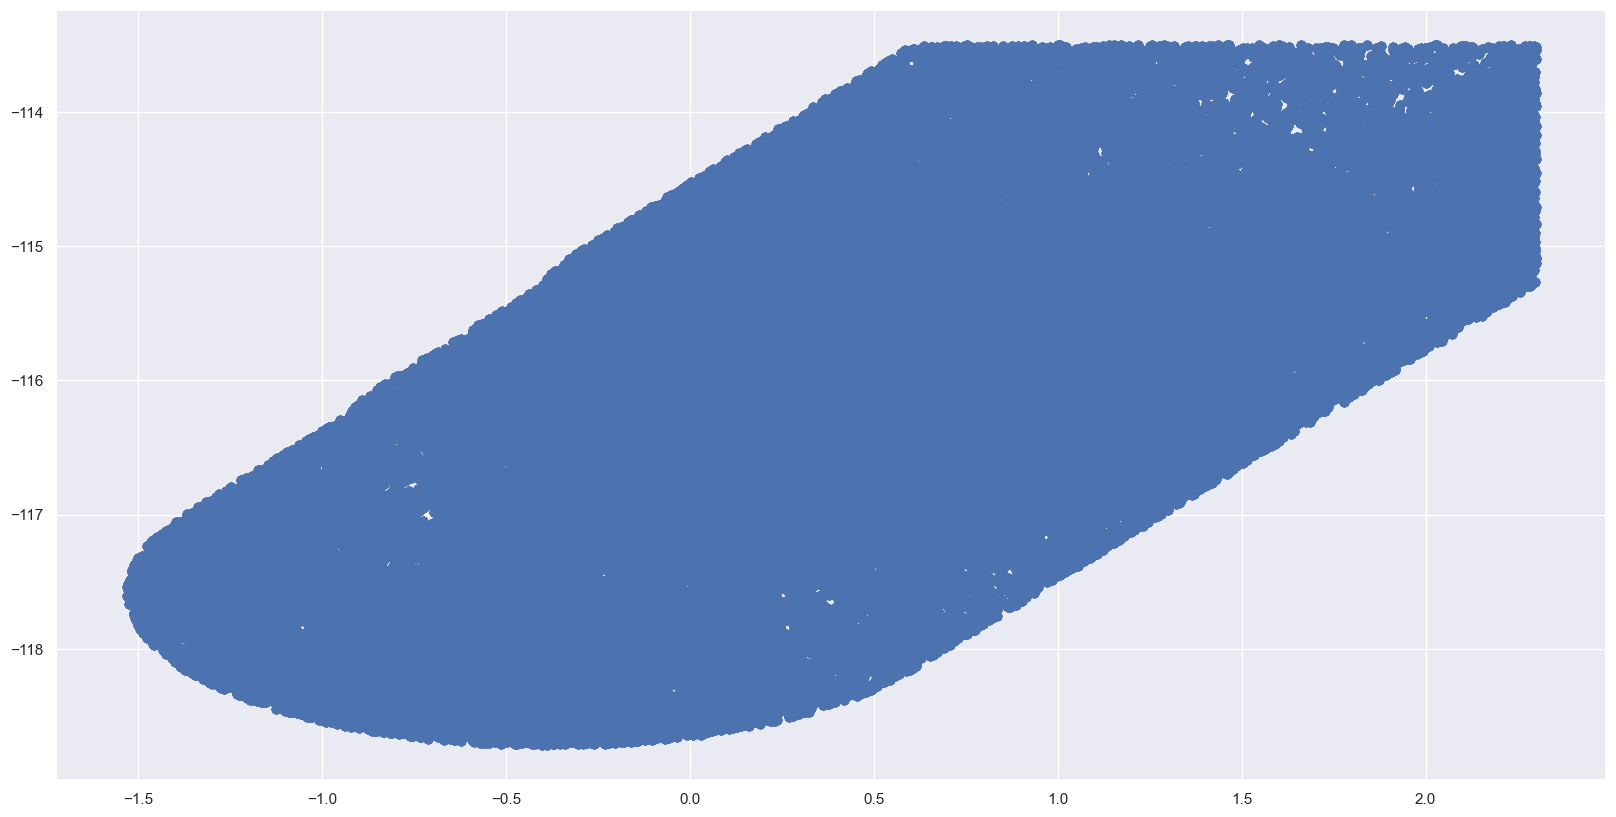

In [465]:
# plot The UE Data
plt.scatter(UE_data['Latitude'], UE_data['Longitude'])
plt.ylim()
plt.xlim()
plt.show()

# 3. Select Features

# 3.1 Group Data point on the basis of similarity : Latitude and Longitude

In [466]:
# Select some feature
x = UE_data.iloc[:, 1:4]
x

,CellType,Latitude,Longitude
0,0,0.2928,-115.8555
1,0,0.2928,-115.8555
2,1,0.2928,-115.8555
3,1,0.2928,-115.8555
4,2,0.2928,-115.8555
...,...,...,...
377449,0,0.8026,-115.1135
377450,1,0.8026,-115.1135
377451,1,0.8026,-115.1135
377452,2,0.8026,-115.1135


In [467]:
# Clustering
kmeans = KMeans(3)

In [468]:
kmeans.fit(x)

KMeans(n_clusters=3)

In [469]:
# Clustering resuts
identified_clusaters = kmeans.fit_predict(x)
identified_clusaters 

array([0, 0, 0, ..., 2, 2, 2])

In [470]:
data_with_clusters = UE_data.copy()
data_with_clusters['Cluster'] = identified_clusaters
data_with_clusters

,Index,CellType,Latitude,Longitude,Time,Azimuth,Elevation,Range,Free Space Loss,Prop Loss,...,Carrier Power at Rcvr Input,Flux Density,g/T,C/No,C/N,Eb/No,Propagation Delay,Propagation Distance,Spectral Flux Density,Cluster
0,0,0,0.2928,-115.8555,0.000000,143.355488,-81.956980,304.330261,165.600340,165.600340,...,-135.600340,-90.917295,20,52.998799,37.947299,40.957599,0.001046,313.516082,-165.968795,0
1,0,0,0.2928,-115.8555,12.115721,166.458699,-68.345139,325.251116,165.257559,165.257559,...,-135.257559,-90.574514,20,53.341580,38.290080,41.300380,0.001005,301.384403,-165.626014,0
2,0,1,0.2928,-115.8555,0.000000,16.609009,-73.525173,313.516082,165.600340,165.600340,...,-135.600340,-90.917295,20,52.998799,37.947299,40.957599,0.001046,313.516082,-165.968795,0
3,0,1,0.2928,-115.8555,30.382608,165.204452,-67.304924,326.362599,165.949179,165.949179,...,-135.949179,-91.266134,20,52.649960,37.598460,40.608760,0.001089,326.363646,-166.317634,0
4,0,2,0.2928,-115.8555,12.907000,13.626764,-68.343815,325.250193,165.257957,165.257957,...,-135.257957,-90.574912,20,53.341182,38.289683,41.299982,0.001005,301.398207,-165.626412,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377449,62908,0,0.8026,-115.1135,26.913681,169.795343,-68.357782,325.106585,165.237268,165.237268,...,-135.237268,-90.554223,20,53.361871,38.310371,41.320671,0.001003,300.681178,-165.605723,2
377450,62908,1,0.8026,-115.1135,8.789004,7.856444,-67.304023,326.544524,165.953992,165.953992,...,-135.953992,-91.270947,20,52.645147,37.593647,40.603947,0.001089,326.544535,-166.322447,2
377451,62908,1,0.8026,-115.1135,45.210641,168.401659,-67.303099,326.139140,165.943227,165.943227,...,-135.943227,-91.260183,20,52.655911,37.604412,40.614712,0.001088,326.140108,-166.311683,2
377452,62908,2,0.8026,-115.1135,27.317074,10.249170,-68.359521,325.097955,165.237344,165.237344,...,-135.237344,-90.554300,20,53.361795,38.310295,41.320595,0.001003,300.683814,-165.605799,2


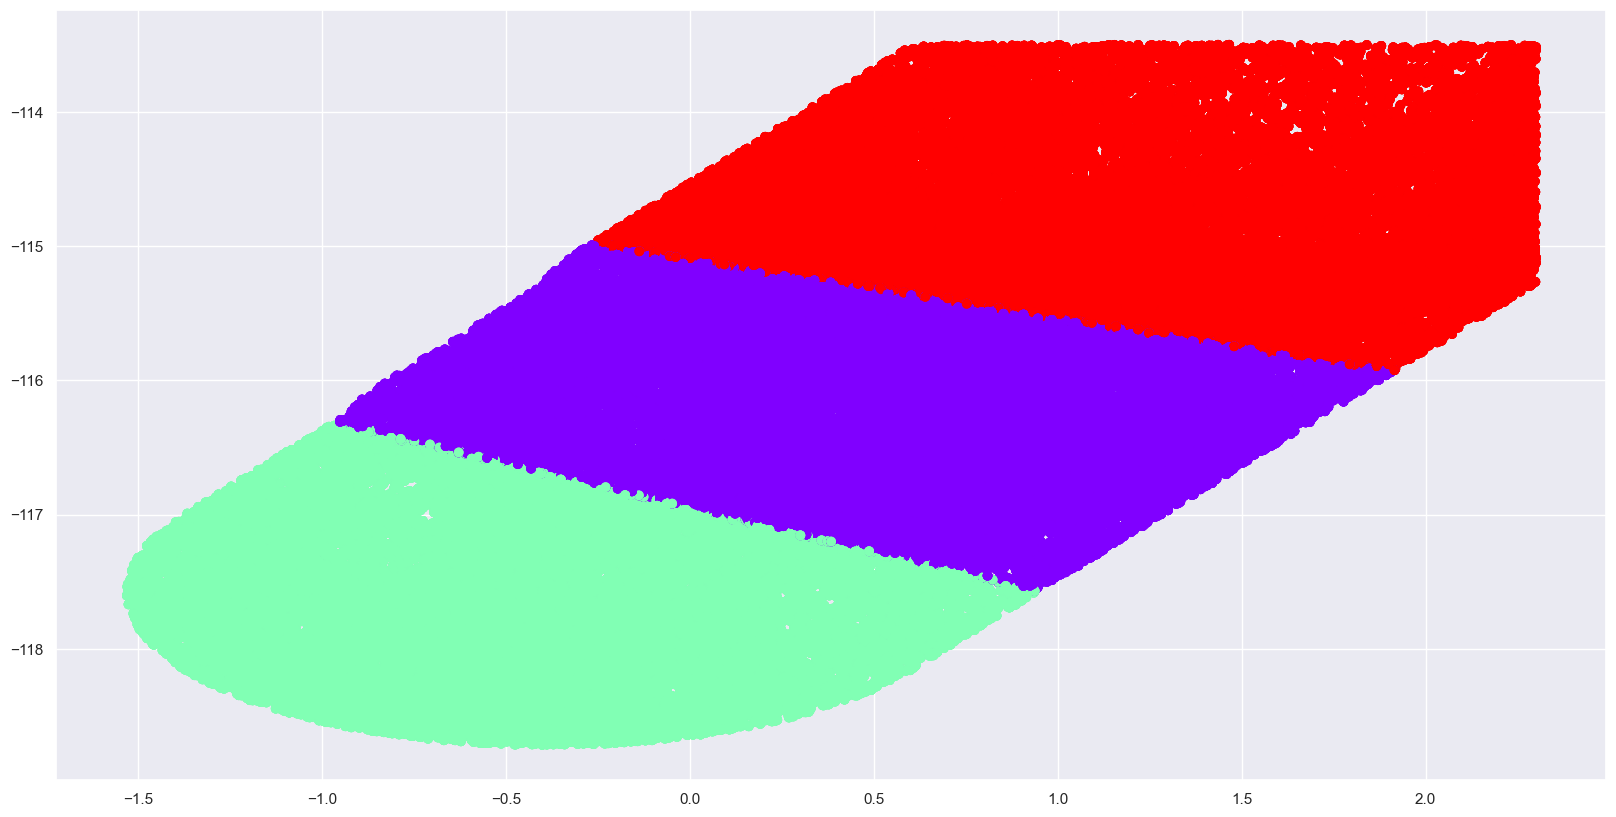

In [471]:
# plot the Data
plt.scatter(UE_data['Latitude'], UE_data['Longitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.ylim()
plt.xlim()
plt.show()

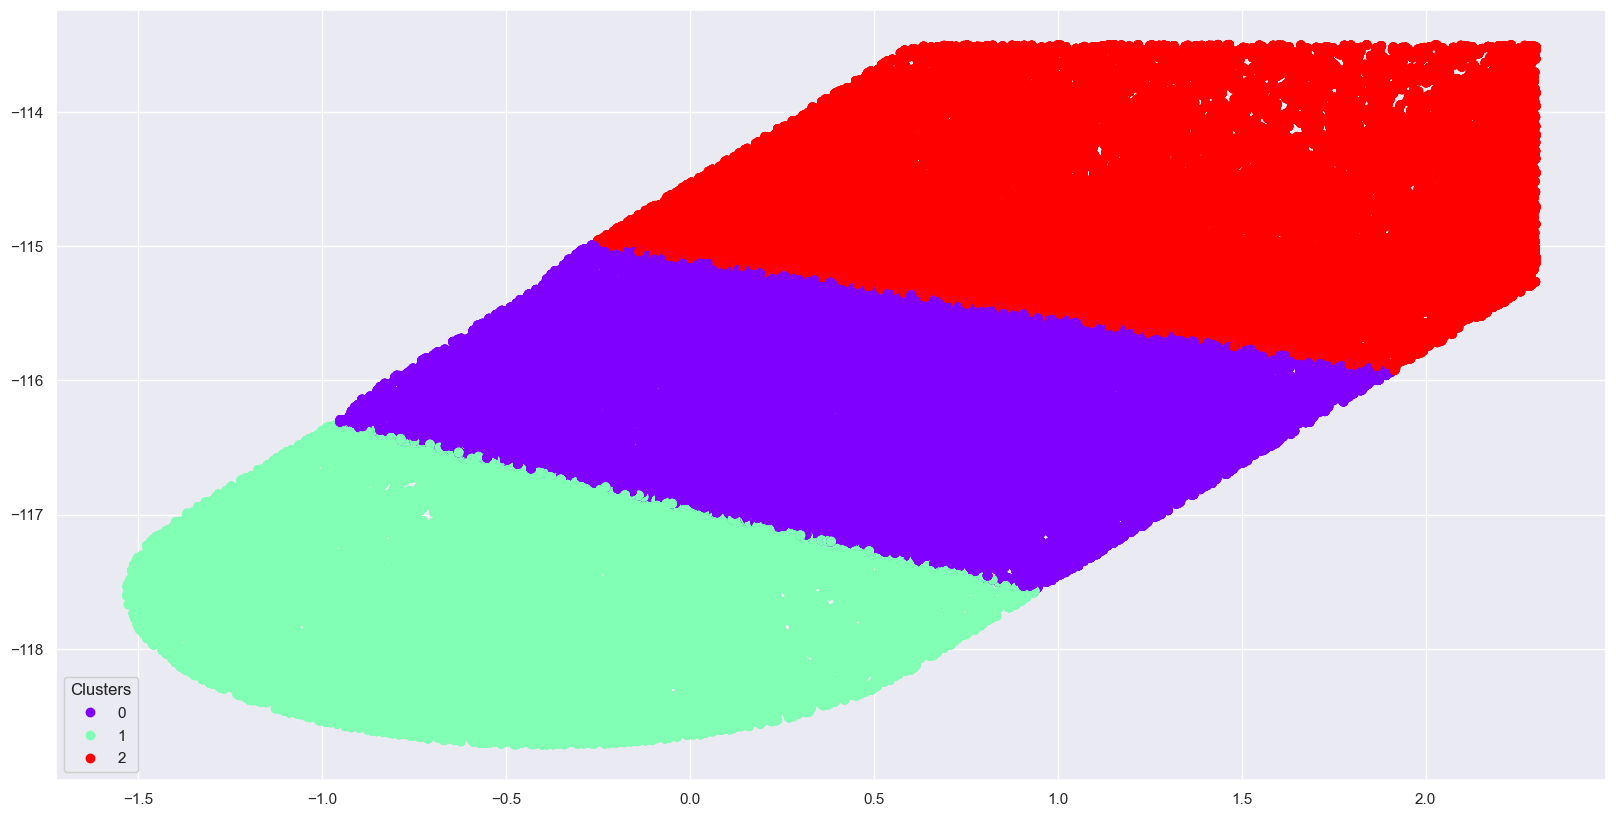

In [472]:
fig, ax = plt.subplots()
scatter = ax.scatter(UE_data['Latitude'], UE_data['Longitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(), loc='lower left', title='Clusters')
ax.add_artist(legend1)
plt.show()

# 3.2 Group Data point on the basis of similarity :  Latitude, Longitude, and Time

In [473]:
# Select some feature
x2 = UE_data.iloc[:, 1:5]
x2

,CellType,Latitude,Longitude,Time
0,0,0.2928,-115.8555,0.000000
1,0,0.2928,-115.8555,12.115721
2,1,0.2928,-115.8555,0.000000
3,1,0.2928,-115.8555,30.382608
4,2,0.2928,-115.8555,12.907000
...,...,...,...,...
377449,0,0.8026,-115.1135,26.913681
377450,1,0.8026,-115.1135,8.789004
377451,1,0.8026,-115.1135,45.210641
377452,2,0.8026,-115.1135,27.317074


In [474]:
# Clustering
kmeans2 = KMeans(3)

In [475]:
# Clustering resuts
identified_clusaters2 = kmeans2.fit_predict(x2)
identified_clusaters2 

array([1, 1, 1, ..., 2, 0, 2])

In [476]:
data_with_clusters2 = UE_data.copy()
data_with_clusters2['Cluster_type_2'] = identified_clusaters2
data_with_clusters2

,Index,CellType,Latitude,Longitude,Time,Azimuth,Elevation,Range,Free Space Loss,Prop Loss,...,Carrier Power at Rcvr Input,Flux Density,g/T,C/No,C/N,Eb/No,Propagation Delay,Propagation Distance,Spectral Flux Density,Cluster_type_2
0,0,0,0.2928,-115.8555,0.000000,143.355488,-81.956980,304.330261,165.600340,165.600340,...,-135.600340,-90.917295,20,52.998799,37.947299,40.957599,0.001046,313.516082,-165.968795,1
1,0,0,0.2928,-115.8555,12.115721,166.458699,-68.345139,325.251116,165.257559,165.257559,...,-135.257559,-90.574514,20,53.341580,38.290080,41.300380,0.001005,301.384403,-165.626014,1
2,0,1,0.2928,-115.8555,0.000000,16.609009,-73.525173,313.516082,165.600340,165.600340,...,-135.600340,-90.917295,20,52.998799,37.947299,40.957599,0.001046,313.516082,-165.968795,1
3,0,1,0.2928,-115.8555,30.382608,165.204452,-67.304924,326.362599,165.949179,165.949179,...,-135.949179,-91.266134,20,52.649960,37.598460,40.608760,0.001089,326.363646,-166.317634,0
4,0,2,0.2928,-115.8555,12.907000,13.626764,-68.343815,325.250193,165.257957,165.257957,...,-135.257957,-90.574912,20,53.341182,38.289683,41.299982,0.001005,301.398207,-165.626412,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377449,62908,0,0.8026,-115.1135,26.913681,169.795343,-68.357782,325.106585,165.237268,165.237268,...,-135.237268,-90.554223,20,53.361871,38.310371,41.320671,0.001003,300.681178,-165.605723,0
377450,62908,1,0.8026,-115.1135,8.789004,7.856444,-67.304023,326.544524,165.953992,165.953992,...,-135.953992,-91.270947,20,52.645147,37.593647,40.603947,0.001089,326.544535,-166.322447,1
377451,62908,1,0.8026,-115.1135,45.210641,168.401659,-67.303099,326.139140,165.943227,165.943227,...,-135.943227,-91.260183,20,52.655911,37.604412,40.614712,0.001088,326.140108,-166.311683,2
377452,62908,2,0.8026,-115.1135,27.317074,10.249170,-68.359521,325.097955,165.237344,165.237344,...,-135.237344,-90.554300,20,53.361795,38.310295,41.320595,0.001003,300.683814,-165.605799,0


In [477]:
# plot the Data
#plt.scatter(UE_data['Latitude'],UE_data['Longitude'],UE_data['Time'], c=data_with_clusters['Cluster_type_2'], cmap='rainbow')
#plt.ylim()
#plt.xlim()
#plt.show()

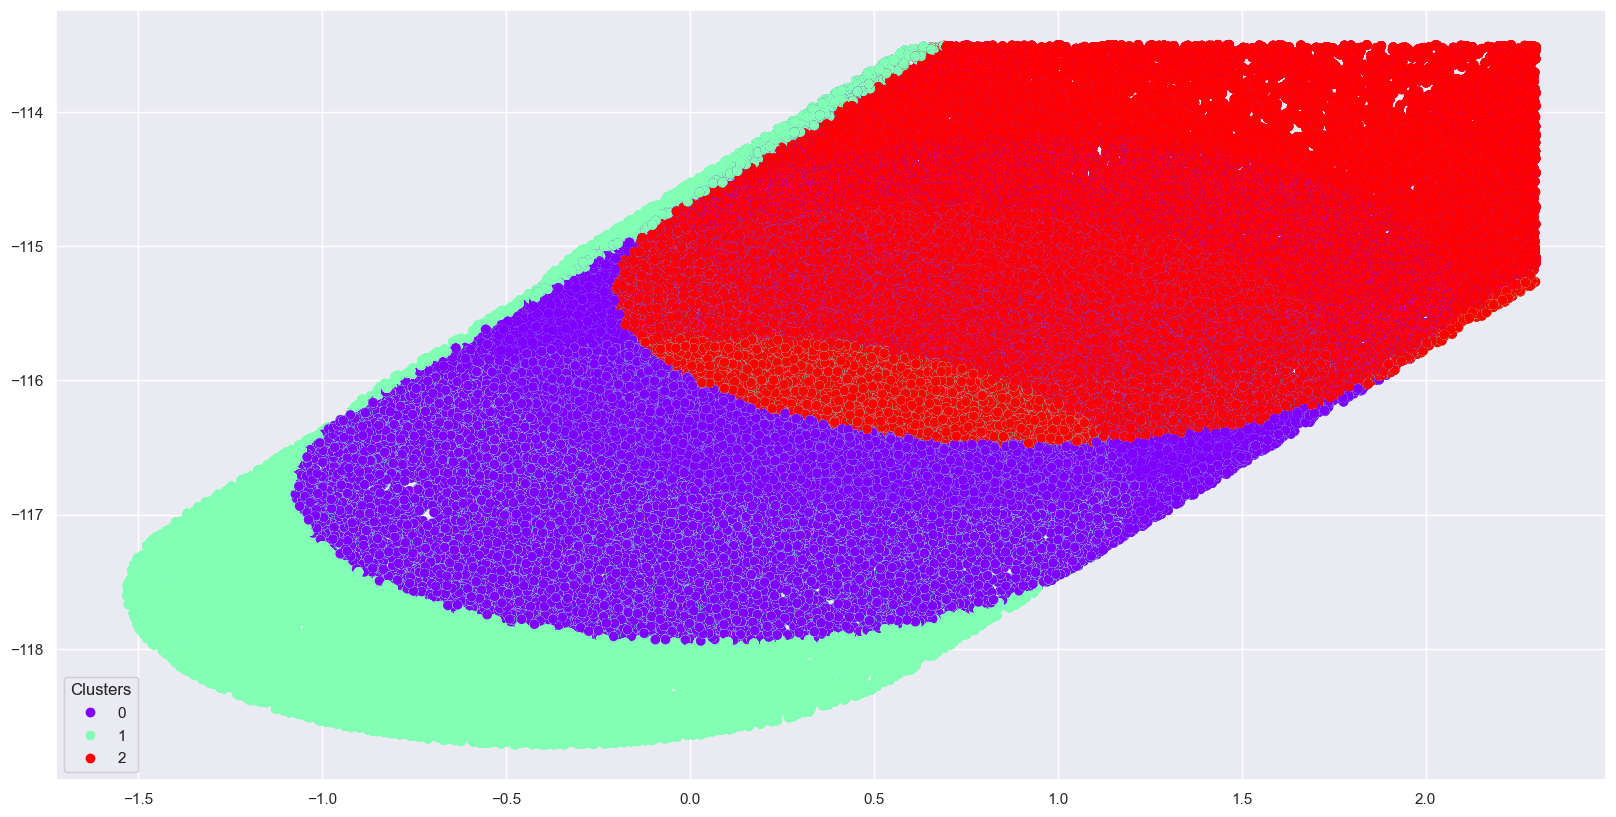

In [478]:
fig, ax = plt.subplots()
scatter = ax.scatter(UE_data['Latitude'], UE_data['Longitude'], c=data_with_clusters2['Cluster_type_2'], cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(), loc='lower left', title='Clusters')
ax.add_artist(legend1)
plt.show()

# KMeans Clustering in Customer Segmentation

# EDA

# 3.3 Create Target Time

In [479]:
UE_data_For_Classifier = UE_data.loc[0:19999, :]

In [480]:
UE_data_For_Classifier

,Index,CellType,Latitude,Longitude,Time,Azimuth,Elevation,Range,Free Space Loss,Prop Loss,Rcvd. Iso. Power,Carrier Power at Rcvr Input,Flux Density,g/T,C/No,C/N,Eb/No,Propagation Delay,Propagation Distance,Spectral Flux Density
0,0,0,0.2928,-115.8555,0.000000,143.355488,-81.956980,304.330261,165.600340,165.600340,-135.600340,-135.600340,-90.917295,20,52.998799,37.947299,40.957599,0.001046,313.516082,-165.968795
1,0,0,0.2928,-115.8555,12.115721,166.458699,-68.345139,325.251116,165.257559,165.257559,-135.257559,-135.257559,-90.574514,20,53.341580,38.290080,41.300380,0.001005,301.384403,-165.626014
2,0,1,0.2928,-115.8555,0.000000,16.609009,-73.525173,313.516082,165.600340,165.600340,-135.600340,-135.600340,-90.917295,20,52.998799,37.947299,40.957599,0.001046,313.516082,-165.968795
3,0,1,0.2928,-115.8555,30.382608,165.204452,-67.304924,326.362599,165.949179,165.949179,-135.949179,-135.949179,-91.266134,20,52.649960,37.598460,40.608760,0.001089,326.363646,-166.317634
4,0,2,0.2928,-115.8555,12.907000,13.626764,-68.343815,325.250193,165.257957,165.257957,-135.257957,-135.257957,-90.574912,20,53.341182,38.289683,41.299982,0.001005,301.398207,-165.626412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3332,1,-0.3633,-116.6210,13.315000,155.888784,-67.304778,326.517088,165.953262,165.953262,-135.953262,-135.953262,-91.270217,20,52.645877,37.594378,40.604677,0.001089,326.517088,-166.321717
19996,3332,2,-0.3633,-116.6210,0.000000,27.034489,-70.542263,320.385020,165.364488,165.364488,-135.364488,-135.364488,-90.681443,20,53.234651,38.183151,41.193451,0.001018,305.117582,-165.732943
19997,3332,2,-0.3633,-116.6210,31.622670,155.227358,-66.334871,330.143966,167.530044,167.530044,-137.530044,-137.530044,-92.847000,20,51.069094,36.017595,39.027895,0.001306,391.511983,-167.898500
19998,3333,0,-0.3033,-115.6614,0.000000,116.465261,-70.897472,319.653534,165.876156,165.876156,-135.876156,-135.876156,-91.193111,20,52.722983,37.671483,40.681783,0.001080,323.631389,-166.244611


In [481]:
# Create Target : Time > 40 seconde : Ready for Handover
UE_data_For_Classifier['Ready_for_HO'] = np.where(UE_data_For_Classifier['Time'] > 40, 'Ready', 'Non_Ready')

C:\Users\MWAMBA\AppData\Local\Temp\ipykernel_8800\822476783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UE_data_For_Classifier['Ready_for_HO'] = np.where(UE_data_For_Classifier['Time'] > 40, 'Ready', 'Non_Ready')


In [482]:
UE_data_For_Classifier

,Index,CellType,Latitude,Longitude,Time,Azimuth,Elevation,Range,Free Space Loss,Prop Loss,...,Carrier Power at Rcvr Input,Flux Density,g/T,C/No,C/N,Eb/No,Propagation Delay,Propagation Distance,Spectral Flux Density,Ready_for_HO
0,0,0,0.2928,-115.8555,0.000000,143.355488,-81.956980,304.330261,165.600340,165.600340,...,-135.600340,-90.917295,20,52.998799,37.947299,40.957599,0.001046,313.516082,-165.968795,Non_Ready
1,0,0,0.2928,-115.8555,12.115721,166.458699,-68.345139,325.251116,165.257559,165.257559,...,-135.257559,-90.574514,20,53.341580,38.290080,41.300380,0.001005,301.384403,-165.626014,Non_Ready
2,0,1,0.2928,-115.8555,0.000000,16.609009,-73.525173,313.516082,165.600340,165.600340,...,-135.600340,-90.917295,20,52.998799,37.947299,40.957599,0.001046,313.516082,-165.968795,Non_Ready
3,0,1,0.2928,-115.8555,30.382608,165.204452,-67.304924,326.362599,165.949179,165.949179,...,-135.949179,-91.266134,20,52.649960,37.598460,40.608760,0.001089,326.363646,-166.317634,Non_Ready
4,0,2,0.2928,-115.8555,12.907000,13.626764,-68.343815,325.250193,165.257957,165.257957,...,-135.257957,-90.574912,20,53.341182,38.289683,41.299982,0.001005,301.398207,-165.626412,Non_Ready
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3332,1,-0.3633,-116.6210,13.315000,155.888784,-67.304778,326.517088,165.953262,165.953262,...,-135.953262,-91.270217,20,52.645877,37.594378,40.604677,0.001089,326.517088,-166.321717,Non_Ready
19996,3332,2,-0.3633,-116.6210,0.000000,27.034489,-70.542263,320.385020,165.364488,165.364488,...,-135.364488,-90.681443,20,53.234651,38.183151,41.193451,0.001018,305.117582,-165.732943,Non_Ready
19997,3332,2,-0.3633,-116.6210,31.622670,155.227358,-66.334871,330.143966,167.530044,167.530044,...,-137.530044,-92.847000,20,51.069094,36.017595,39.027895,0.001306,391.511983,-167.898500,Non_Ready
19998,3333,0,-0.3033,-115.6614,0.000000,116.465261,-70.897472,319.653534,165.876156,165.876156,...,-135.876156,-91.193111,20,52.722983,37.671483,40.681783,0.001080,323.631389,-166.244611,Non_Ready


In [483]:
UE_data_For_Classifier['Ready_for_HO'].unique()

array(['Non_Ready', 'Ready'], dtype=object)

In [484]:
UE_data_For_Classifier['Ready_for_HO'].value_counts()

Non_Ready    16320
Ready         3680
Name: Ready_for_HO, dtype: int64

In [485]:
# Map the Output
targets = UE_data_For_Classifier['Ready_for_HO'].map({
    'Non_Ready':0,
    'Ready':1
})

In [486]:
UE_data_For_Classifier['HO_Ready'] = targets

C:\Users\MWAMBA\AppData\Local\Temp\ipykernel_8800\2333764610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UE_data_For_Classifier['HO_Ready'] = targets


In [487]:
UE_data_For_Classifier.head()

,Index,CellType,Latitude,Longitude,Time,Azimuth,Elevation,Range,Free Space Loss,Prop Loss,...,Flux Density,g/T,C/No,C/N,Eb/No,Propagation Delay,Propagation Distance,Spectral Flux Density,Ready_for_HO,HO_Ready
0,0,0,0.2928,-115.8555,0.000000,143.355488,-81.956980,304.330261,165.600340,165.600340,...,-90.917295,20,52.998799,37.947299,40.957599,0.001046,313.516082,-165.968795,Non_Ready,0
1,0,0,0.2928,-115.8555,12.115721,166.458699,-68.345139,325.251116,165.257559,165.257559,...,-90.574514,20,53.341580,38.290080,41.300380,0.001005,301.384403,-165.626014,Non_Ready,0
2,0,1,0.2928,-115.8555,0.000000,16.609009,-73.525173,313.516082,165.600340,165.600340,...,-90.917295,20,52.998799,37.947299,40.957599,0.001046,313.516082,-165.968795,Non_Ready,0
3,0,1,0.2928,-115.8555,30.382608,165.204452,-67.304924,326.362599,165.949179,165.949179,...,-91.266134,20,52.649960,37.598460,40.608760,0.001089,326.363646,-166.317634,Non_Ready,0
4,0,2,0.2928,-115.8555,12.907000,13.626764,-68.343815,325.250193,165.257957,165.257957,...,-90.574912,20,53.341182,38.289683,41.299982,0.001005,301.398207,-165.626412,Non_Ready,0


In [488]:
targets.sum() / targets.shape[0]

0.184

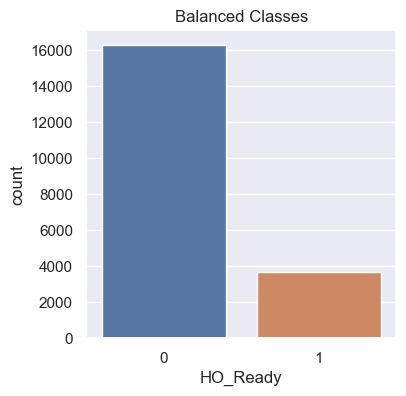

In [489]:
# Plot the dataset after the undersampling
plt.figure(figsize=(4, 4))
sns.countplot(x=UE_data_For_Classifier['HO_Ready'])
plt.title('Balanced Classes')
plt.show()

# Fix Imbalanced Dataset

In [490]:
# Shuffle the Dataset
shuffled_UE_data = UE_data_For_Classifier.sample(frac=1, random_state=4)

In [491]:
# Put all the Ready class in a separate dataset
Ready = shuffled_UE_data.loc[shuffled_UE_data['HO_Ready'] == 1]

In [492]:
# Randomly select 2818 observations from the Non Ready (majority Class)
Non_Ready = shuffled_UE_data.loc[shuffled_UE_data['HO_Ready'] == 0].sample(n=5594, random_state=42)

In [493]:
# Concatenate both Dataframmes again
normalized_UE_data = pd.concat([Ready, Non_Ready])

In [494]:
normalized_UE_data

,Index,CellType,Latitude,Longitude,Time,Azimuth,Elevation,Range,Free Space Loss,Prop Loss,...,Flux Density,g/T,C/No,C/N,Eb/No,Propagation Delay,Propagation Distance,Spectral Flux Density,Ready_for_HO,HO_Ready
8745,1457,1,0.2824,-114.6399,41.099842,127.341268,-67.300471,326.214288,165.945210,165.945210,...,-91.262165,20,52.653929,37.602429,40.612729,0.001088,326.214561,-166.313665,Ready,1
7859,1309,2,0.6901,-115.4180,58.603000,170.014234,-66.248074,329.870958,167.598985,167.598985,...,-92.915941,20,51.000154,35.948654,38.958954,0.001316,394.631813,-167.967440,Ready,1
208,34,2,2.0014,-113.9522,53.478000,346.592599,-68.344714,324.722989,165.242685,165.242685,...,-90.559640,20,53.356454,38.304955,41.315255,0.001004,300.868737,-165.611140,Ready,1
6143,1023,2,1.1318,-113.6577,83.483000,142.994693,-66.452617,328.594301,167.389293,167.389293,...,-92.706248,20,51.209846,36.158347,39.168647,0.001285,385.218790,-167.757748,Ready,1
12238,2039,2,1.0424,-113.9195,48.819174,33.228138,-68.206376,325.129239,165.437852,165.437852,...,-90.754807,20,53.161287,38.109787,41.120087,0.001026,307.705612,-165.806307,Ready,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8354,1392,1,0.5700,-116.9120,0.000000,266.502173,-79.114755,305.790279,165.383617,165.383617,...,-90.700572,20,53.215522,38.164022,41.174322,0.001020,305.790279,-165.752072,Non_Ready,0
16090,2681,2,0.2238,-115.0087,28.692316,43.371335,-68.093748,325.713388,165.597153,165.597153,...,-90.914109,20,53.001986,37.950486,40.960786,0.001045,313.401084,-165.965608,Non_Ready,0
13404,2234,0,1.0022,-115.8424,0.000000,276.053272,-81.866619,304.408689,166.009982,166.009982,...,-91.326938,20,52.589157,37.537657,40.547957,0.001096,328.656293,-166.378437,Non_Ready,0
4920,820,0,0.3514,-117.2641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Non_Ready,0


In [495]:
normalized_UE_data['Ready_for_HO'].value_counts()

Non_Ready    5594
Ready        3680
Name: Ready_for_HO, dtype: int64

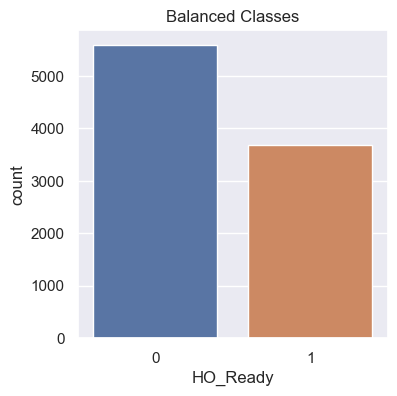

In [496]:
# Plot the dataset after the undersampling
plt.figure(figsize=(4, 4))
sns.countplot(x=normalized_UE_data['HO_Ready'])
plt.title('Balanced Classes')
plt.show()

In [497]:
normalized_UE_data = normalized_UE_data.drop(['Ready_for_HO'], axis=1)

In [498]:
normalized_UE_data

,Index,CellType,Latitude,Longitude,Time,Azimuth,Elevation,Range,Free Space Loss,Prop Loss,...,Carrier Power at Rcvr Input,Flux Density,g/T,C/No,C/N,Eb/No,Propagation Delay,Propagation Distance,Spectral Flux Density,HO_Ready
8745,1457,1,0.2824,-114.6399,41.099842,127.341268,-67.300471,326.214288,165.945210,165.945210,...,-135.945210,-91.262165,20,52.653929,37.602429,40.612729,0.001088,326.214561,-166.313665,1
7859,1309,2,0.6901,-115.4180,58.603000,170.014234,-66.248074,329.870958,167.598985,167.598985,...,-137.598985,-92.915941,20,51.000154,35.948654,38.958954,0.001316,394.631813,-167.967440,1
208,34,2,2.0014,-113.9522,53.478000,346.592599,-68.344714,324.722989,165.242685,165.242685,...,-135.242685,-90.559640,20,53.356454,38.304955,41.315255,0.001004,300.868737,-165.611140,1
6143,1023,2,1.1318,-113.6577,83.483000,142.994693,-66.452617,328.594301,167.389293,167.389293,...,-137.389293,-92.706248,20,51.209846,36.158347,39.168647,0.001285,385.218790,-167.757748,1
12238,2039,2,1.0424,-113.9195,48.819174,33.228138,-68.206376,325.129239,165.437852,165.437852,...,-135.437852,-90.754807,20,53.161287,38.109787,41.120087,0.001026,307.705612,-165.806307,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8354,1392,1,0.5700,-116.9120,0.000000,266.502173,-79.114755,305.790279,165.383617,165.383617,...,-135.383617,-90.700572,20,53.215522,38.164022,41.174322,0.001020,305.790279,-165.752072,0
16090,2681,2,0.2238,-115.0087,28.692316,43.371335,-68.093748,325.713388,165.597153,165.597153,...,-135.597153,-90.914109,20,53.001986,37.950486,40.960786,0.001045,313.401084,-165.965608,0
13404,2234,0,1.0022,-115.8424,0.000000,276.053272,-81.866619,304.408689,166.009982,166.009982,...,-136.009982,-91.326938,20,52.589157,37.537657,40.547957,0.001096,328.656293,-166.378437,0
4920,820,0,0.3514,-117.2641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


# Select the inputs for the Regression

In [499]:
inputs = normalized_UE_data.iloc[:, 0:19]
target = normalized_UE_data['HO_Ready']

In [500]:
inputs

,Index,CellType,Latitude,Longitude,Time,Azimuth,Elevation,Range,Free Space Loss,Prop Loss,Rcvd. Iso. Power,Carrier Power at Rcvr Input,Flux Density,g/T,C/No,C/N,Eb/No,Propagation Delay,Propagation Distance
8745,1457,1,0.2824,-114.6399,41.099842,127.341268,-67.300471,326.214288,165.945210,165.945210,-135.945210,-135.945210,-91.262165,20,52.653929,37.602429,40.612729,0.001088,326.214561
7859,1309,2,0.6901,-115.4180,58.603000,170.014234,-66.248074,329.870958,167.598985,167.598985,-137.598985,-137.598985,-92.915941,20,51.000154,35.948654,38.958954,0.001316,394.631813
208,34,2,2.0014,-113.9522,53.478000,346.592599,-68.344714,324.722989,165.242685,165.242685,-135.242685,-135.242685,-90.559640,20,53.356454,38.304955,41.315255,0.001004,300.868737
6143,1023,2,1.1318,-113.6577,83.483000,142.994693,-66.452617,328.594301,167.389293,167.389293,-137.389293,-137.389293,-92.706248,20,51.209846,36.158347,39.168647,0.001285,385.218790
12238,2039,2,1.0424,-113.9195,48.819174,33.228138,-68.206376,325.129239,165.437852,165.437852,-135.437852,-135.437852,-90.754807,20,53.161287,38.109787,41.120087,0.001026,307.705612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8354,1392,1,0.5700,-116.9120,0.000000,266.502173,-79.114755,305.790279,165.383617,165.383617,-135.383617,-135.383617,-90.700572,20,53.215522,38.164022,41.174322,0.001020,305.790279
16090,2681,2,0.2238,-115.0087,28.692316,43.371335,-68.093748,325.713388,165.597153,165.597153,-135.597153,-135.597153,-90.914109,20,53.001986,37.950486,40.960786,0.001045,313.401084
13404,2234,0,1.0022,-115.8424,0.000000,276.053272,-81.866619,304.408689,166.009982,166.009982,-136.009982,-136.009982,-91.326938,20,52.589157,37.537657,40.547957,0.001096,328.656293
4920,820,0,0.3514,-117.2641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000


In [501]:
target 

8745     1
7859     1
208      1
6143     1
12238    1
        ..
8354     0
16090    0
13404    0
4920     0
16206    0
Name: HO_Ready, Length: 9274, dtype: int64

# Standardize The Data

In [502]:
unscalled_inputs = normalized_UE_data.iloc[:,:-1]

In [503]:
unscalled_inputs

,Index,CellType,Latitude,Longitude,Time,Azimuth,Elevation,Range,Free Space Loss,Prop Loss,Rcvd. Iso. Power,Carrier Power at Rcvr Input,Flux Density,g/T,C/No,C/N,Eb/No,Propagation Delay,Propagation Distance,Spectral Flux Density
8745,1457,1,0.2824,-114.6399,41.099842,127.341268,-67.300471,326.214288,165.945210,165.945210,-135.945210,-135.945210,-91.262165,20,52.653929,37.602429,40.612729,0.001088,326.214561,-166.313665
7859,1309,2,0.6901,-115.4180,58.603000,170.014234,-66.248074,329.870958,167.598985,167.598985,-137.598985,-137.598985,-92.915941,20,51.000154,35.948654,38.958954,0.001316,394.631813,-167.967440
208,34,2,2.0014,-113.9522,53.478000,346.592599,-68.344714,324.722989,165.242685,165.242685,-135.242685,-135.242685,-90.559640,20,53.356454,38.304955,41.315255,0.001004,300.868737,-165.611140
6143,1023,2,1.1318,-113.6577,83.483000,142.994693,-66.452617,328.594301,167.389293,167.389293,-137.389293,-137.389293,-92.706248,20,51.209846,36.158347,39.168647,0.001285,385.218790,-167.757748
12238,2039,2,1.0424,-113.9195,48.819174,33.228138,-68.206376,325.129239,165.437852,165.437852,-135.437852,-135.437852,-90.754807,20,53.161287,38.109787,41.120087,0.001026,307.705612,-165.806307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8354,1392,1,0.5700,-116.9120,0.000000,266.502173,-79.114755,305.790279,165.383617,165.383617,-135.383617,-135.383617,-90.700572,20,53.215522,38.164022,41.174322,0.001020,305.790279,-165.752072
16090,2681,2,0.2238,-115.0087,28.692316,43.371335,-68.093748,325.713388,165.597153,165.597153,-135.597153,-135.597153,-90.914109,20,53.001986,37.950486,40.960786,0.001045,313.401084,-165.965608
13404,2234,0,1.0022,-115.8424,0.000000,276.053272,-81.866619,304.408689,166.009982,166.009982,-136.009982,-136.009982,-91.326938,20,52.589157,37.537657,40.547957,0.001096,328.656293,-166.378437
4920,820,0,0.3514,-117.2641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [504]:
from sklearn.preprocessing import StandardScaler

In [505]:
UE_date_scaler = StandardScaler()
UE_date_scaler.fit(unscalled_inputs)

StandardScaler()

In [506]:
scaled_inputs = UE_date_scaler.transform(unscalled_inputs)

In [507]:
scaled_inputs

array([[-0.2245835 , -0.17161583, -0.42742715, ...,  0.30268648,
         0.30268648, -0.43413107],
       [-0.37846103,  1.05455148,  0.02464336, ...,  0.8282061 ,
         0.8282061 , -0.46102955],
       [-1.70409512,  1.05455148,  1.47865382, ...,  0.10800273,
         0.10800273, -0.42270456],
       ...,
       [ 0.58327351, -1.39778313,  0.3707096 , ...,  0.32144167,
         0.32144167, -0.43518458],
       [-0.88688069, -1.39778313, -0.35091779, ..., -2.2029995 ,
        -2.2029995 ,  2.27094362],
       [ 1.06881948, -1.39778313,  1.25832904, ...,  0.70964443,
         0.70964443, -0.45539279]])

In [508]:
scaled_inputs.shape

(9274, 20)

# Splitting The Data for Training and Testing

In [509]:
from sklearn.model_selection import train_test_split

In [510]:
# Split 
train_test_split(scaled_inputs, target)

[array([[-1.12081612, -0.17161583, -0.43075364, ...,  0.17045885,
          0.17045885, -0.42647192],
        [ 1.57827886, -1.39778313,  0.78685398, ...,  0.16611581,
          0.16611581, -0.42621317],
        [-0.9191118 ,  1.05455148,  0.50132993, ...,  0.81862456,
          0.81862456, -0.46058228],
        ...,
        [-0.32751509, -1.39778313, -1.33312054, ..., -2.2029995 ,
         -2.2029995 ,  2.27094362],
        [ 0.99188072,  1.05455148,  0.8597042 , ...,  0.77251176,
          0.77251176, -0.45840967],
        [ 1.09897116,  1.05455148, -0.18237544, ...,  0.45756342,
          0.45756342, -0.44260407]]),
 array([[ 0.79433525,  1.05455148,  0.040167  , ...,  0.78245271,
          0.78245271, -0.45888087],
        [ 0.04470217,  1.05455148, -1.1027054 , ...,  0.79798426,
          0.79798426, -0.45961393],
        [-0.92223093, -0.17161583, -2.06639066, ..., -2.2029995 ,
         -2.2029995 ,  2.27094362],
        ...,
        [ 1.32146974, -0.17161583, -0.55339038, ...,  

In [511]:
x_train, X_test, y_train, y_test = train_test_split(scaled_inputs, target, train_size=0.8)

In [512]:
print(x_train.shape, y_train.shape)

(7419, 20) (7419,)


In [513]:
print(X_test.shape, y_test.shape)

(1855, 20) (1855,)


# Machine Learnong Model

# 1. Logistic regression

In [514]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [515]:
reg = LogisticRegression()
reg.fit(x_train, y_train)

LogisticRegression()

In [516]:
reg.score(x_train, y_train)

0.9928561800781777

# 2. Neural Network

In [517]:
# Learning model parameters
epochs =50
batch_size = 15
dr = 0.1                  # dropout rate  


In [518]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=19))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
classifier.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 4)                 80        
                                                                 
 dense_16 (Dense)            (None, 4)                 20        
                                                                 
 dense_17 (Dense)            (None, 1)                 5         
                                                                 
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


In [519]:
#Fitting the data to the training dataset
history =classifier.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/50


ValueError: in user code:

    File "c:\Users\MWAMBA\anaconda3\envs\clustering_HO\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\MWAMBA\anaconda3\envs\clustering_HO\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\MWAMBA\anaconda3\envs\clustering_HO\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\MWAMBA\anaconda3\envs\clustering_HO\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\MWAMBA\anaconda3\envs\clustering_HO\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\MWAMBA\anaconda3\envs\clustering_HO\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 19), found shape=(None, 20)


In [ ]:
eval_model=classifier.evaluate(x_train, y_train)
eval_model

In [ ]:
# Check how loss & mse went down
epoch_loss = history.history['loss']
epoch_val_loss = history.history['val_loss']
epoch_mae = history.history['accuracy']
epoch_val_mae = history.history['val_accuracy']

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(range(0,len(epoch_loss)), epoch_loss, 'b-', linewidth=2, label='Train Loss')
plt.plot(range(0,len(epoch_val_loss)), epoch_val_loss, 'r-', linewidth=2, label='Test Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Loss')
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.plot(range(0,len(epoch_mae)), epoch_mae, 'b-', linewidth=2, label='Train Acc')
plt.plot(range(0,len(epoch_val_mae)), epoch_val_mae, 'r-', linewidth=2,label='Test Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Accuracy')
plt.legend(loc='best')

plt.show()
#plt.savefig('Figure_LossAcc/Loss_Acc_.png')

        

In [ ]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)